In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import xgboost as xgb
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Loading the dataset into a dataframe
data =pd.read_csv("diabetic_preprocessed_data.csv")

In [4]:
data

,Unnamed: 0,encounter_id,patient_nbr,age,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,...,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Others,diag_3_Respiratory,readmitted
0,0,2278392,8222157,5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,149190,55629189,15,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2,64410,86047875,25,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,500364,82442376,35,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,16680,42519267,45,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,101761,443847548,100162476,75,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
101762,101762,443847782,74694222,85,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
101763,101763,443854148,41088789,75,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
101764,101764,443857166,31693671,85,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
# Separate features (X) and target variable (y)
X = data.drop("readmitted", axis=1)
y = data["readmitted"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)

Accuracy: 0.8868527070846025
Precision: 0.3902439024390244
Recall: 0.01400437636761488
F1 Score: 0.02703844528939586
AUC Score: 0.5056186030379777


Model 1:
Accuracy: 0.8847401002259998
Precision: 0.3105590062111801
Recall: 0.02188183807439825
F1 Score: 0.04088307440719542
AUC Score: 0.5078693600134567

Model 2:
Accuracy: 0.8871474894369658
Precision: 0.4117647058823529
Recall: 0.01225382932166302
F1 Score: 0.023799405014874625
AUC Score: 0.5050200465441677

Model 3:
Accuracy: 0.887737054141692
Precision: 0.5
Recall: 0.016192560175054705
F1 Score: 0.03136922424756253
AUC Score: 0.5070724270796132

Model 4:
Accuracy: 0.8874422717893289
Precision: 0.4423076923076923
Recall: 0.010065645514223195
F1 Score: 0.019683354728284128
AUC Score: 0.5042303433725303

Model 5:
Accuracy: 0.8874422717893289
Precision: 0.45
Recall: 0.011816192560175055
F1 Score: 0.02302771855010661
AUC Score: 0.5049949300838398

Model 6:
Accuracy: 0.887737054141692
Precision: 0.5
Recall: 0.010940919037199124
F1 Score: 0.021413276231263385
AUC Score: 0.5047786669456846

Model 7:
Accuracy: 0.8879335757099341
Precision: 0.5370370370370371
Recall: 0.012691466083150985


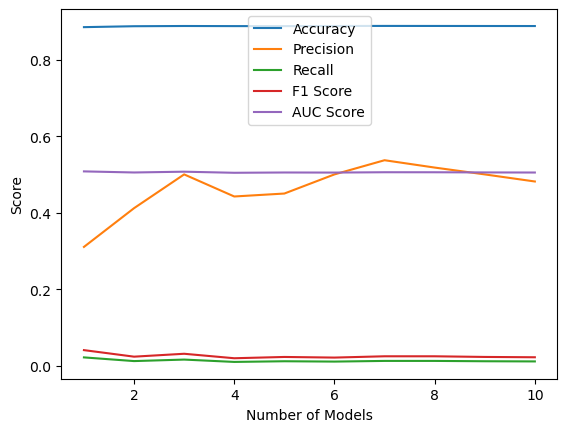

In [7]:
num_models = 10  # Number of models to use
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []

for i in range(1, num_models + 1):
    base_model = xgb.XGBClassifier()  # Initialize an XGBoost model as the base estimator
    model = BaggingClassifier(base_estimator=base_model, n_estimators=i)

    # Train the Bagging model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    # Store the scores
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    auc_scores.append(auc)

# Print the evaluation metrics for each model
for i in range(num_models):
    print(f"Model {i+1}:")
    print("Accuracy:", accuracy_scores[i])
    print("Precision:", precision_scores[i])
    print("Recall:", recall_scores[i])
    print("F1 Score:", f1_scores[i])
    print("AUC Score:", auc_scores[i])
    print()

# Plot the performance scores
x = range(1, num_models + 1)

plt.plot(x, accuracy_scores, label='Accuracy')
plt.plot(x, precision_scores, label='Precision')
plt.plot(x, recall_scores, label='Recall')
plt.plot(x, f1_scores, label='F1 Score')
plt.plot(x, auc_scores, label='AUC Score')

plt.xlabel('Number of Models')
plt.ylabel('Score')
plt.legend()
plt.show()


In [8]:
# Initialize lists to store the evaluation metrics for different numbers of models
num_models_list = list(range(1, 11))
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for num_models in num_models_list:
    # Create an AdaBoost classifier with the specified number of models (XGBoost classifiers)
    base_model = xgb.XGBClassifier()
    boosting_model = AdaBoostClassifier(base_estimator=base_model, n_estimators=num_models, random_state=42)

    # Train the Boosting model
    boosting_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = boosting_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    # Append the metrics to the lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

# Print the evaluation metrics for different numbers of models
print("Number of Models | Accuracy | Precision | Recall | F1 Score | AUC")
print("-" * 65)
for i in range(len(num_models_list)):
    print(f"{num_models_list[i]:<16} | {accuracy_list[i]:<8.4f} | {precision_list[i]:<9.4f} | {recall_list[i]:<6.4f} | {f1_list[i]:<8.4f} | {auc_list[i]:<4.4f}")

Number of Models | Accuracy | Precision | Recall | F1 Score | AUC
-----------------------------------------------------------------
1                | 0.8877   | 0.0000    | 0.0000 | 0.0000   | 0.5000
2                | 0.8877   | 0.0000    | 0.0000 | 0.0000   | 0.5000
3                | 0.8877   | 0.0000    | 0.0000 | 0.0000   | 0.5000
4                | 0.8877   | 0.0000    | 0.0000 | 0.0000   | 0.5000
5                | 0.8877   | 0.0000    | 0.0000 | 0.0000   | 0.5000
6                | 0.8877   | 0.0000    | 0.0000 | 0.0000   | 0.5000
7                | 0.8877   | 0.0000    | 0.0000 | 0.0000   | 0.5000
8                | 0.8877   | 0.0000    | 0.0000 | 0.0000   | 0.5000
9                | 0.8877   | 0.0000    | 0.0000 | 0.0000   | 0.5000
10               | 0.8877   | 0.0000    | 0.0000 | 0.0000   | 0.5000


Best Hyperparameters: {'base_estimator__learning_rate': 0.1, 'base_estimator__max_depth': 3, 'n_estimators': 5}
Accuracy: 0.887737054141692
F1 Score: 0.0
Precision: 0.0
Recall: 0.0


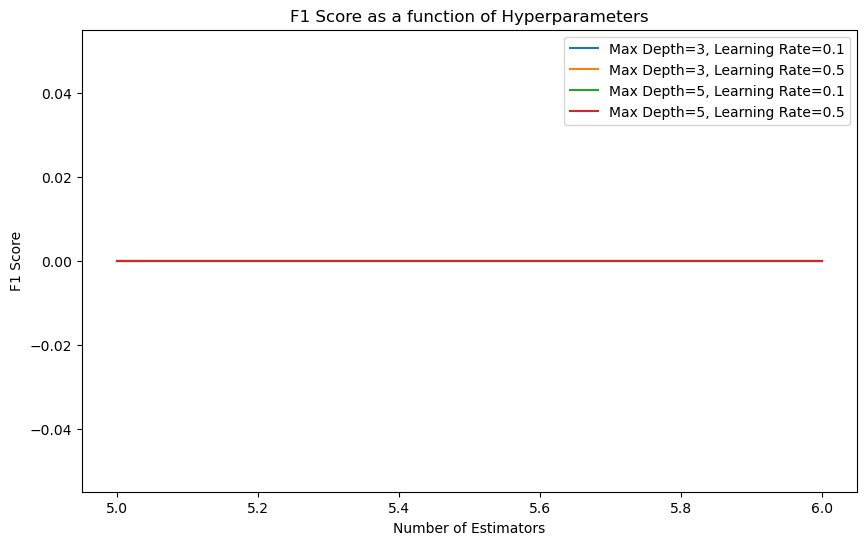

In [9]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [5, 6],  # Number of base estimators
    'base_estimator__max_depth': [3, 5],  # Max depth of the base estimator (XGBoost)
    'base_estimator__learning_rate': [0.1, 0.5]  # Learning rate of the base estimator
}

# Initialize the AdaBoost classifier with XGBoost as the base estimator
base_estimator = xgb.XGBClassifier(random_state=42)
boosting = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(boosting, param_grid, scoring='f1', cv=4)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation scores
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Plotting the performance graph
# Define the hyperparameter values
n_estimators_values = param_grid['n_estimators']
max_depth_values = param_grid['base_estimator__max_depth']
learning_rate_values = param_grid['base_estimator__learning_rate']

# Initialize lists to store F1 scores
f1_scores = []

# Iterate over the hyperparameter values
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for learning_rate in learning_rate_values:
            # Train the model and make predictions
            boosting.set_params(n_estimators=n_estimators,
                                base_estimator__max_depth=max_depth,
                                base_estimator__learning_rate=learning_rate)
            boosting.fit(X_train, y_train)
            y_pred = boosting.predict(X_test)

            # Calculate the F1 score
            f1 = f1_score(y_test, y_pred)

            # Append the F1 score to the list
            f1_scores.append(f1)

# Reshape the F1 scores to match the hyperparameter grid
f1_scores = np.array(f1_scores).reshape(len(n_estimators_values), len(max_depth_values), len(learning_rate_values))

# Plot the line graph
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Plot lines for each max_depth value
for i, max_depth in enumerate(max_depth_values):
    for j, learning_rate in enumerate(learning_rate_values):
        ax.plot(n_estimators_values, f1_scores[:, i, j], label=f"Max Depth={max_depth}, Learning Rate={learning_rate}")

ax.set_xlabel('Number of Estimators')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score as a function of Hyperparameters')
ax.legend()
plt.show()

Best Hyperparameters: {'base_estimator__learning_rate': 0.5, 'base_estimator__max_depth': 5, 'n_estimators': 4}
Accuracy: 0.8874914021813894
F1 Score: 0.028013582342954157
Precision: 0.4647887323943662
Recall: 0.014442013129102845


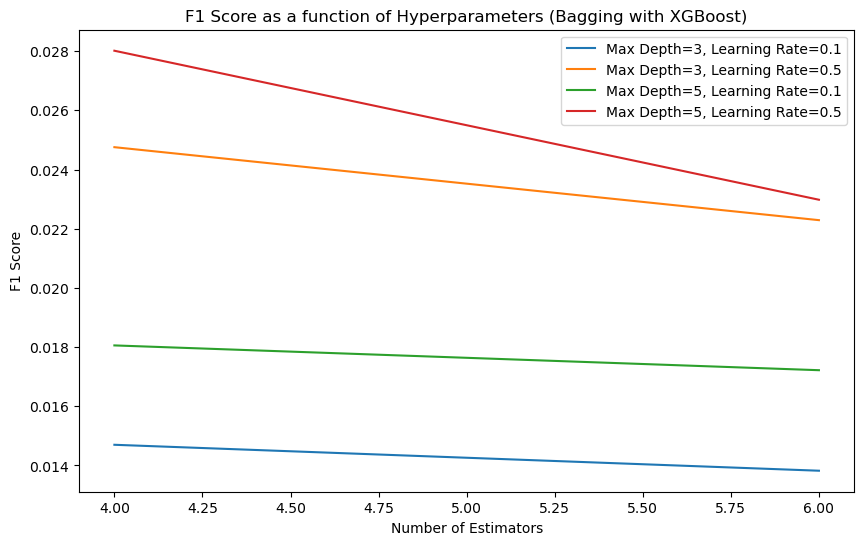

In [10]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [4, 6],  # Number of base estimators
    'base_estimator__max_depth': [3, 5],  # Max depth of the base estimator (XGBoost)
    'base_estimator__learning_rate': [0.1, 0.5]  # Learning rate of the base estimator
}

# Initialize the Bagging classifier with XGBoost as the base estimator
base_estimator = xgb.XGBClassifier(random_state=42)
bagging = BaggingClassifier(base_estimator=base_estimator, random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(bagging, param_grid, scoring='f1', cv=4)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation scores
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Plotting the performance graph
# Define the hyperparameter values
n_estimators_values = param_grid['n_estimators']
max_depth_values = param_grid['base_estimator__max_depth']
learning_rate_values = param_grid['base_estimator__learning_rate']

# Initialize lists to store F1 scores
f1_scores = []

# Iterate over the hyperparameter values
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for learning_rate in learning_rate_values:
            # Train the model and make predictions
            bagging.set_params(n_estimators=n_estimators,
                               base_estimator__max_depth=max_depth,
                               base_estimator__learning_rate=learning_rate)
            bagging.fit(X_train, y_train)
            y_pred = bagging.predict(X_test)

            # Calculate the F1 score
            f1 = f1_score(y_test, y_pred)

            # Append the F1 score to the list
            f1_scores.append(f1)

# Reshape the F1 scores to match the hyperparameter grid
f1_scores = np.array(f1_scores).reshape(len(n_estimators_values), len(max_depth_values), len(learning_rate_values))

# Plot the line graph
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Plot lines for each max_depth value
for i, max_depth in enumerate(max_depth_values):
    for j, learning_rate in enumerate(learning_rate_values):
        ax.plot(n_estimators_values, f1_scores[:, i, j], label=f"Max Depth={max_depth}, Learning Rate={learning_rate}")

ax.set_xlabel('Number of Estimators')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score as a function of Hyperparameters (Bagging with XGBoost)')
ax.legend()
plt.show()